# Sparse Hebbian Learning: basics

In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
%run setup.py --description

 This is a collection of python scripts to test learning strategies to efficiently code natural image patches.  This is here restricted  to the framework of the [SparseNet algorithm from Bruno Olshausen](http://redwood.berkeley.edu/bruno/sparsenet/).


In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True)

In [16]:
from shl_scripts import SHL
DEBUG_DOWNSCALE, verbose = 10, 0
DEBUG_DOWNSCALE, verbose = 1, 0
DEBUG_DOWNSCALE, verbose = 10, 10


In [17]:
shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, learning_algorithm='omp', verbose=verbose, eta=.1, n_image=10, n_iter=100)
data = shl.get_data(name_database='serre07_distractors')

Extracting data...Bdn_text64.jpg, Mda_hous31.jpg, Hdn_objn26.jpg, Bdn_natu5.jpg, Fdn_bea25.jpg, Fda_A277094.jpg, Fdn_land362.jpg, Bdn_objn35.jpg, Hdn_N115088.jpg, Hda_obj205.jpg, 
Data is of shape : (1000, 144)done in 0.41s.

In [18]:
print('number of patches, size of patches = ', data.shape)
print('average of patches = ', data.mean())
print('average energy of patches = ', data.std(axis=0).mean())
print('std of the average of individual patches = ', data.mean(axis=0).std())

number of patches, size of patches =  (1000, 144)
average of patches =  0.0
average energy of patches =  1.0
std of the average of individual patches =  1.27567686455e-17


Extracting data...Bdn_text16.jpg, Fdn_land353.jpg, Mda_par135.jpg, Fda_A487089.jpg, Fdn_land951.jpg, Fdn_open20.jpg, Hdn_objn181.jpg, Bda_art1155.jpg, Bdn_natu379.jpg, Hdn_natu623.jpg, 
Data is of shape : (1000, 144)done in 0.41s.Learning the dictionary... Training on 1000 patches... Iteration   0 /   10 (elapsed time:   0s,  0.0mn)
Norm  1.0 1.0 84
Gain  1.0 1.0 0
number of jobs  8
Iteration   1 /   10 (elapsed time:   4s,  0.1mn)
Norm  0.996748887457 1.06457999957 60
Gain  0.999970385333 1.00013320242 2
number of jobs  8
Iteration   2 /   10 (elapsed time:   7s,  0.1mn)
Norm  0.989637202887 1.04293483602 115
Gain  0.999942107222 1.00018184202 86
number of jobs  8
Iteration   3 /   10 (elapsed time:   9s,  0.2mn)
Norm  0.994035574802 1.06669956251 111
Gain  0.999905353416 1.00038305808 2
number of jobs  8
Iteration   4 /   10 (elapsed time:  12s,  0.2mn)
Norm  0.994975380239 1.04191698766 4
Gain  0.999882747511 1.00055385769 2
number of jobs  8

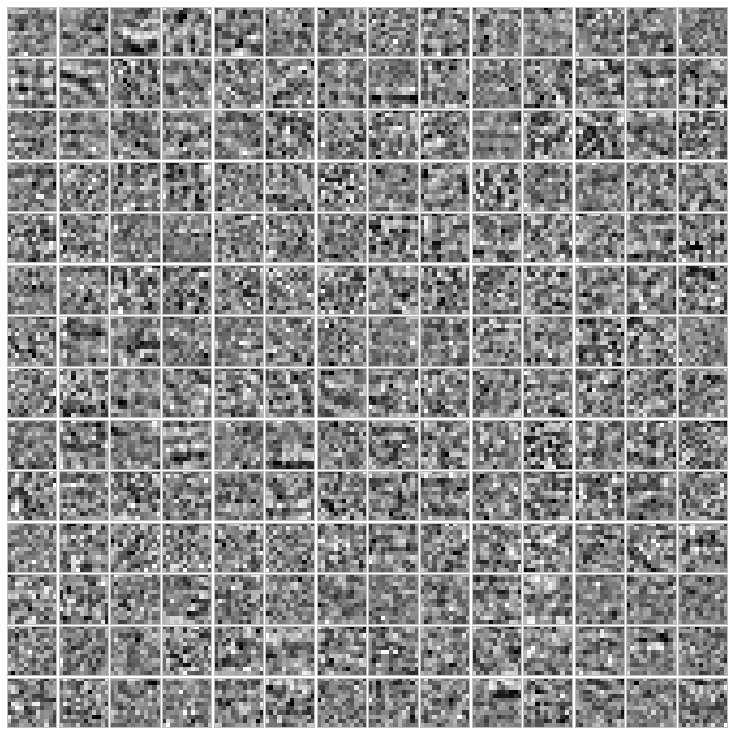

In [19]:
dico = shl.learn_dico()
_ = shl.show_dico(dico)
patches = shl.code(data, dico)

In [20]:
print('number of patches, size of patches = ', patches.shape)
print('average of patches = ', patches.mean())
print('average energy of patches = ', patches.std(axis=0).mean())
print('std of the average of individual patches = ', patches.mean(axis=0).std())

number of patches, size of patches =  (1000, 144)
average of patches =  -0.00443667286995
average energy of patches =  0.698740842422
std of the average of individual patches =  0.0106645667694


In [21]:
code = dico.transform(data)
print('number of patches, size of patches = ', code.shape)
print('average of patches = ', code.mean())
print('average energy of patches = ', code.std(axis=0).mean())
print('std of the average of individual patches = ', code.mean(axis=0).std())

number of jobs  -1
number of patches, size of patches =  (1000, 196)
average of patches =  0.000936102821968
average energy of patches =  0.577951772299
std of the average of individual patches =  0.015901225545


In [22]:
V = dico.components_
print(code[0,:])
patches = np.dot(code, V)
print(data[0,:], patches[0,:])

[ 0.      0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.2467  0.      0.      0.     -0.1896
  0.      0.1702 -0.4173  0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.3637  0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.2484  0.      0.      0.      0.      0.2683  0.      0.      0.
 -0.1562  0.      0.      0.      0.      0.      0.      0.     -0.2708
  0.     -0.2066  0.      0.2462  0.      0.      0.      0.      0.
 -0.1429  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.181   0.      0.
 -0.3065  0.     -0.2274  0.     -0.2235  0.     -0.1272  0.      0.      0.
  0.      0.      0.      0.   

In [23]:
error = data - patches
print('number of patches, size of patches = ', error.shape)
print('average of patches = ', error.mean())
print('average energy of patches = ', error.std(axis=0).mean())
print('std of the average of individual patches = ', error.mean(axis=0).std())

number of patches, size of patches =  (1000, 144)
average of patches =  0.00443667286995
average energy of patches =  0.635908986234
std of the average of individual patches =  0.0106645667694


## Version used

In [24]:
%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py
%load_ext version_information
%version_information numpy

Installed version_information.py. To use it, type:
  %load_ext version_information
The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 3.5.0 64bit [GCC 4.2.1 Compatible Apple LLVM 6.1.0 (clang-602.0.53)]
IPython 4.0.0
OS Darwin 15.0.0 x86_64 i386 64bit
numpy 1.10.1
Tue Oct 20 17:17:12 2015 CEST